# The power-law lens

The power-law lens has a convergence profile of the kind
$$
\kappa(x)=\frac{3-n}{2}x^{1-n}
$$

The corresponding mass profile is 
$$
m(x)=x^{3-n}
$$
which implies that the deflection angle is 
$$
\alpha(x)=x^{2-n}
$$
and that the shear profile is
$$
\gamma(x)=\frac{m(x)}{x^2}-\kappa(x)=\frac{n-1}{2}x^{1-n} \;.
$$

Here are some plots of some of the relevant quantities.

In [3]:
from scipy.optimize import fsolve, newton

class pl_lens(object):
    def __init__(self,co,n=1.0,zl=0.5,zs=2.0,thetae=1.0):
        self.n=n
        self.thetae=thetae
        self.co=co
        
    def kappa(self,x):
        return((3.0-self.n)/2.0*np.abs(x)**(1.0-self.n))
    
    def gamma(self,x):
        return(np.abs((self.n-1.0)/2.0*np.abs(x)**(1.0-self.n)))
    
    def mass(self,x):
        return(np.abs(x)**(3.0-self.n))
    
    def alpha(self,x):
        return(np.sign(x)*np.abs(x)**(2.0-self.n))
    
    def lambdar(self,x):
        return 1-(2.0-self.n)*np.abs(x)**(1.0-self.n)

    def lambdat(self,x):
        return 1-np.abs(x)**(1.0-self.n)
    
    def radcl(self):
        return((2.0-self.n)**(1./(self.n-1)))

    def radcau(self):
        return -(self.radcl()-self.alpha(self.radcl()))

    def ext_source(self,yc1,yc2,rs):
        phi=np.linspace(0,2.*np.pi,1000)
        y1=yc1+rs*np.cos(phi)
        y2=yc2+rs*np.sin(phi)
        return(y1,y2,phi)
    
    def ext_images(self,yc1,yc2,rs):
        y1,y2,phi2=self.ext_source(yc1,yc2,rs)
        ys=np.sqrt(y1*y1+y2*y2)
        xi1=[]
        xi2=[]
        xi3=[]
        phi1=[]
        phi2=[]
        phi3=[]
        for j in range(len(ys)):
            def func(xx):
                return (xx-ys[j]-pl.alpha(xx))
            x0_ = fsolve(func,ys[j]+1.0)
            x1_ = fsolve(func,ys[j]-1.0)
            x3_ = fsolve(func,0.0)
            phi=np.arctan2(y2[j],y1[j])
            if (np.abs(func(x0_))<1e-8):
                xi1.append(x0_)
                phi1.append(phi)
            if (np.abs(func(x1_))<1e-8 and (np.sign(x1_) != np.sign(ys[j]))):
                xi2.append(x1_)
                phi2.append(phi)
            if (np.abs(func(x3_))<1e-8 and (np.sign(x1_) != np.sign(ys[j]))):
                xi3.append(x3_)
                phi3.append(phi)
        xi1=np.array(xi1).reshape(len(xi1))
        xi2=np.array(xi2).reshape(len(xi2))
        xi3=np.array(xi3).reshape(len(xi3))
        return(xi1,phi1,xi2,phi2,xi3,phi3)
    
    def pot_power(self,x):
        return 1.0/(3.0-self.n)*np.abs(x)**(3.0-self.n)
    
    #utils
    def SigmaCrit(self):
        from astropy.constants import c, G
        dl=self.co.angular_diameter_distance(self.zl)
        ds=self.co.angular_diameter_distance(self.zs)
        dls=self.co.angular_diameter_distance_z1z2(self.zl,self.zs)
        c2_G_Msun_Mpc = (c**2/G).to(u.Msun/u.Mpc)
        sigma_cr = c2_G_Msun_Mpc/(4*np.pi)*(ds/dl/dls)
        return(sigma_cr)

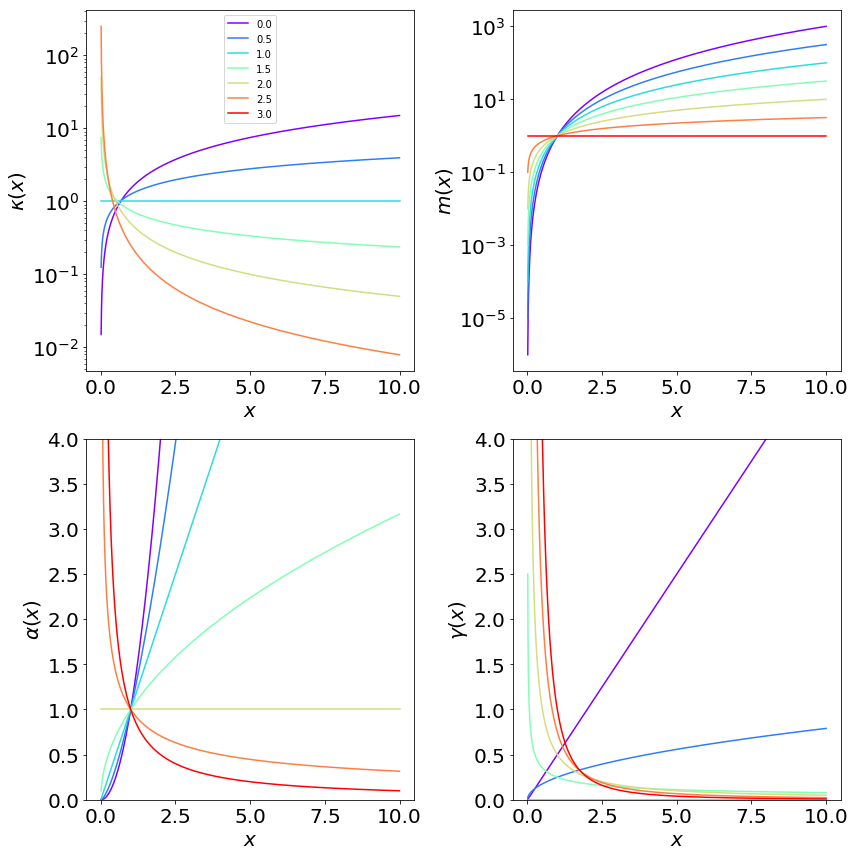

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import cm 
from astropy.cosmology import FlatLambdaCDM
fig,ax=plt.subplots(2,2,figsize=(12,12))

x=np.logspace(-2,1.0,1000)
n=np.linspace(0,3,7)

color=iter(cm.rainbow(np.linspace(0,1,n.size)))
ax[0,0].set_yscale('log')
ax[0,1].set_yscale('log')
ax[1,0].set_ylim([0,4])
ax[1,1].set_ylim([0,4])

"""
When dealing with lenses at cosmological distances,
we need to specify a cosmological model
"""

co = FlatLambdaCDM(H0=70, Om0=0.3)

for i in range(n.size):
    pl=pl_lens(co,n=n[i],zl=0.5,zs=2.0,thetae=1.0)
    c=next(color)
    ka=pl.kappa(x)
    m=pl.mass(x)
    a=pl.alpha(x)
    g=pl.gamma(x)
    ax[0,0].plot(x,ka,color=c,label=str(n[i]))
    ax[0,1].plot(x,m,color=c,label=str(n[i]))
    ax[1,0].plot(x,a,color=c,label=str(n[i]))
    ax[1,1].plot(x,g,color=c,label=str(n[i]))
    
for i in range(2):
    for j in range(2):
        ax[i,j].xaxis.set_tick_params(labelsize=20)
        ax[i,j].yaxis.set_tick_params(labelsize=20)
    
ax[0,0].legend(loc='best')
ax[0,0].set_xlabel('$x$',fontsize=20)
ax[0,0].set_ylabel('$\kappa(x)$',fontsize=20)
ax[0,1].set_xlabel('$x$',fontsize=20)
ax[0,1].set_ylabel('$m(x)$',fontsize=20)
ax[1,0].set_xlabel('$x$',fontsize=20)
ax[1,0].set_ylabel(r'$\alpha(x)$',fontsize=20)
ax[1,1].set_xlabel('$x$',fontsize=20)
ax[1,1].set_ylabel(r'$\gamma(x)$',fontsize=20)

plt.tight_layout()

We can note that:
* for $n<1$, the power-law lens has a monotonically increasing convergence profile. Thus, this kind of lens models are not suited to describe the mass distribution of gravitationally bound systems like galaxies and galaxy clusters;
* for $n=1$, the convergence profile is flat (perfectly convergent lens);
* for $1 < n <2$, the convergence profile is a decreasing function of $x$ and $\alpha(x)$ is zero at origin; 
* for $n=2$, $\alpha(x)=const$, meaning that $\Psi(x)\propto x$ (the time delay surface becomes non-continuously deformable at $x=0$;
* for $2< n < 3$, $\alpha(x)$ diverges for $x\rightarrow 0$. The lensing potential is singular at the origin;
* the case $n=3$ corresponds to the point-mass lens: $m=1=const$, $\alpha(x)=1/x$;
* finally, $n>3$ is un-physical, since it produces mass profiles which decrease with $x$.

## Magnification and critical lines

The magnification is
$$
\det A=(1-\kappa-\gamma)(1-\kappa+\gamma)
$$

In particular, the inverse tangential and the radial magnifications are 
$$
\lambda_t=1-x^{1-n}
$$
and
$$
\lambda_r=1-(2-n)x^{1-n}
$$

The critical lines are given by
$$
x_t=1
$$
and 
$$
x_r=\left(\frac{1}{2-n}\right)^\frac{1}{1-n}=(2-n)^\frac{1}{n-1}
$$

This shows that the radial critical line exists for $1<n<2$.

/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars


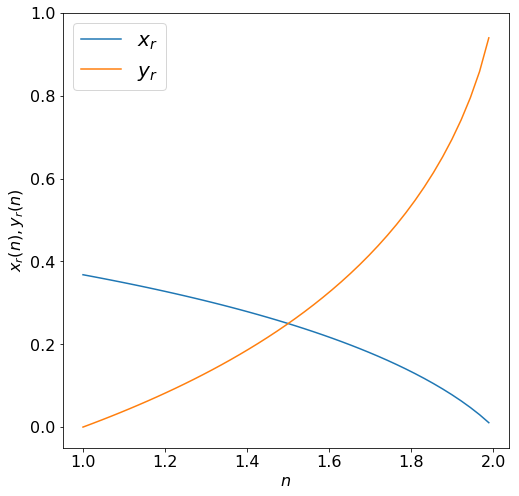

In [5]:
n=np.linspace(1.0001,3,90)

xr=[]
yr=[]

for n_ in n:
    pl=pl_lens(co,n=n_)
    xr.append(pl.radcl())
    yr.append(pl.radcau())
    
fig,ax=plt.subplots(1,1,figsize=(8,8))
ax.plot(n,xr,label=r'$x_r$')
ax.plot(n,yr,label=r'$y_r$')

ax.set_xlabel('$n$',fontsize=16)
ax.set_ylabel('$x_r(n),y_r(n)$',fontsize=16)
#ax.plot([1.0,1.0],[-1,1],':',color='black')
ax.set_ylim([-0.05,1.0])
ax.legend(loc='best',fontsize=20)

ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)

# Multiple images

## Lenses with $n<2$

Let's discuss the occurrence of multiple images. To this goal, it is useful to build the so called "image diagram", comparing the two functions appearing in the lens equation, namely $\alpha(x)$ and $f(x)=x-y$.

The following figure shows the diagram for a power-law lens with $n=1.7$. The function $f(x)$ is shown for different values of $y$.

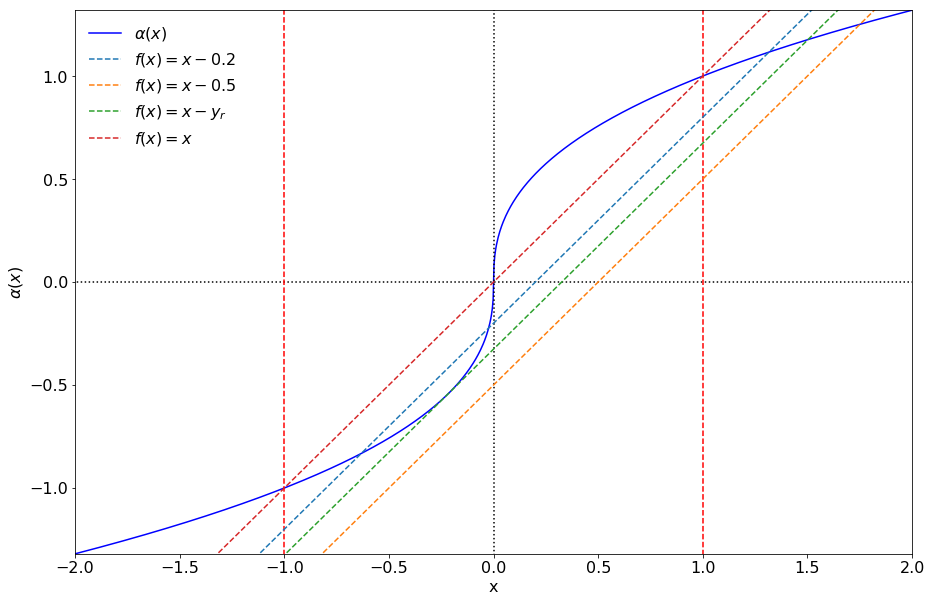

In [6]:
xmin=-2.0
xmax=-xmin
x=np.linspace(xmin,xmax,1000)
pl=pl_lens(co,n=1.6)
a=pl.alpha(x)

fig,ax=plt.subplots(1,1,figsize=(15,10))
ax.plot(x,a,'-',color='blue',label=r'$\alpha(x)$')
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
ax.set_xlabel('x',fontsize=16)
ax.set_ylabel(r'$\alpha(x)$',fontsize=16)

xx=[xmin-0.2,xmax+0.2]
yy=[0,0]
ax.plot(xx,yy,':',color='black')
ax.plot(yy,xx,':',color='black')
ax.set_ylim(np.min(a),np.max(a))
ax.set_xlim(np.min(x),np.max(x))

ax.plot([-1,-1],xx,'--',color='red')
ax.set_ylim(np.min(a),np.max(a))
ax.set_xlim(np.min(x),np.max(x))

ax.plot([1,1],xx,'--',color='red')
ax.set_ylim(np.min(a),np.max(a))
ax.set_xlim(np.min(x),np.max(x))

ys=0.2
f=x-ys
ax.plot(x,f,'--',label=r'$f(x)=x-$'+str(ys))

ys=0.5
f=x-ys
ax.plot(x,f,'--',label=r'$f(x)=x-$'+str(ys))


ys=pl.radcau()
f=x-ys
ax.plot(x,f,'--',label=r'$f(x)=x-y_r$')

ys=0.0
f=x-ys
ax.plot(x,f,'--',label=r'$f(x)=x$')

ax.legend(fontsize=16,frameon=False)

The diagram clearly shows that the appearence of multiple images is tightly connected to the presence of a radial critical line. Indeed, there is maximum distance $y_r$ from the lens center projected onto the source plane, behind which the source won't produce multiple images. This maximum distance can be found by imposing a tangency condition between $\alpha(x)$ and $f(x)$. Since the slope of $f(x)$ is one. This condition writes:

$$
\frac{d\alpha}{dx}=1
$$

which indeed defines the radial critical line. Thus, $y_r$ is the radius of the radial caustic.

The following are some image diagrams for lenses with $n=1.1,1.0,1.5$

/anaconda3/envs/python3/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
No handles with labels found to put in legend.
/anaconda3/envs/python3/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
No handles with labels found to put in legend.
No handles with labels found to put in legend.


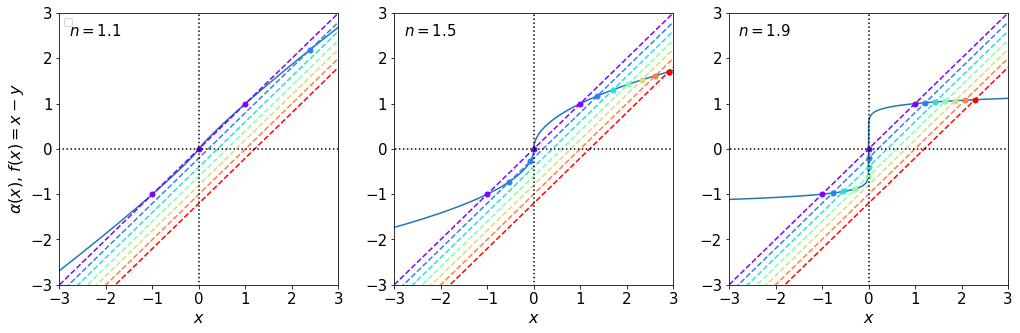

In [7]:
import math
from scipy.optimize import *

n=[1.1,1.5,1.9]

fig,ax=plt.subplots(1,3,figsize=(17,5))

x=np.linspace(-3,3,1000)

def f(x,y):
    return(x-y)
    
ys=np.linspace(0,1.2,7)


    
for i in range(len(n)):
    pl=pl_lens(co,n=n[i])
    a=pl.alpha(x)
    ax[i].plot(x,a,'-')
    color=iter(cm.rainbow(np.linspace(0,1,len(ys))))
    for j in range(len(ys)):
        c=next(color)
        fu=f(x,ys[j])
        ax[i].plot(x,fu,'--',c=c)
        def func(xx):
            return f(xx,ys[j])-pl.alpha(xx)
        x0 = fsolve(func,1.0)
        x1 = fsolve(func,-1.0)
        x3 = fsolve(func,0.0)
        if (np.abs(func(x0))<1e-8):
            ax[i].plot(x0,pl.alpha(x0),'o',markersize=5,c=c)
        if (np.abs(func(x1))<1e-8):
            ax[i].plot(x1,pl.alpha(x1),'o',markersize=5,c=c)
        if (np.abs(func(x3))<1e-8):
            ax[i].plot(x3,pl.alpha(x3),'o',markersize=5,c=c)
        
        
    ax[i].set_xlim([-3,3])
    ax[i].set_ylim([-3,3])
    ax[i].text(-2.8,2.5,'$n=$'+str(n[i]),fontsize=15)

    
    xa=[0.0,0.0]
    ya=[-10,10]
    ax[i].plot(xa,ya,':',color='black')
    
    xa=[-10.0,10.0]
    ya=[0,0]
    ax[i].plot(xa,ya,':',color='black')
    
    ax[0].set_ylabel(r'$\alpha(x)$, $f(x)=x-y$',fontsize=16)
    ax[0].legend()
    for i in range(3):
        ax[i].xaxis.set_tick_params(labelsize=15)
        ax[i].yaxis.set_tick_params(labelsize=15)
        ax[i].set_xlabel('$x$',fontsize=16)

Some noticeable properties:
* these lenses produce three or one image
* three images are formed if the source lays inside the radial critical line, i.e. for $y<y_r$, where $y_r$ corresponds to $x_r: dy/dx=0$

### Extended sources

The code below solves the lens equation for all points on the boundary of a circular extended source, allowing to visualize the images and their distortions.

Text(1.5, 2, 'n=1.2')

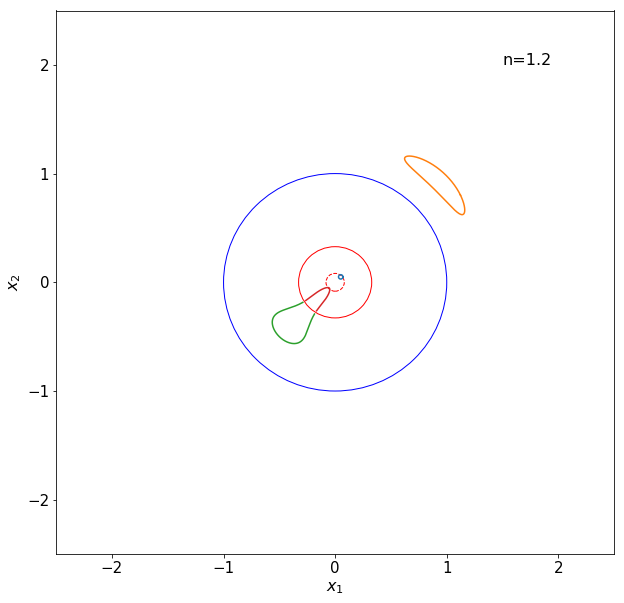

In [10]:
nl=1.2
pl=pl_lens(co,n=nl)
yc1=0.05
yc2=0.05
rs=0.02
ys1,ys2,phi=pl.ext_source(yc1,yc2,rs)
xi1,phi1,xi2,phi2,xi3,phi3=pl.ext_images(yc1,yc2,rs)


fig,ax=plt.subplots(1,1,figsize=(10,10))

er=plt.Circle((0,0),1.0,color='blue',fill=False)
rad_cl=plt.Circle((0,0),pl.radcl(),color='red',fill=False)
rad_cau=plt.Circle((0,0),pl.radcau(),ls='--',color='red',fill=False)
ax.add_artist(er)
ax.add_artist(rad_cl)
ax.add_artist(rad_cau)

ax.plot(ys1,ys2,'-')
x1=np.array(xi1)*np.cos(phi1)
x2=np.array(xi1)*np.sin(phi1)
ax.plot(x1,x2,'-')
if (xi2.size>0):
    x1=np.array(xi2)*np.cos(phi2)
    x2=np.array(xi2)*np.sin(phi2)
    ax.plot(x1,x2,'-')
if (xi3.size>0):
    x1=np.array(xi3)*np.cos(phi3)
    x2=np.array(xi3)*np.sin(phi3)
    ax.plot(x1,x2,'-')

ax.set_xlim([-2.5,2.5])
ax.set_ylim([-2.5,2.5])

ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.set_xlabel(r'$x_1$',fontsize=16)
ax.set_ylabel(r'$x_2$',fontsize=16)
ax.text(1.5,2,'n='+str(nl),fontsize=16)

/Users/massimo/anaconda/lib/python3.6/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/Users/massimo/anaconda/lib/python3.6/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


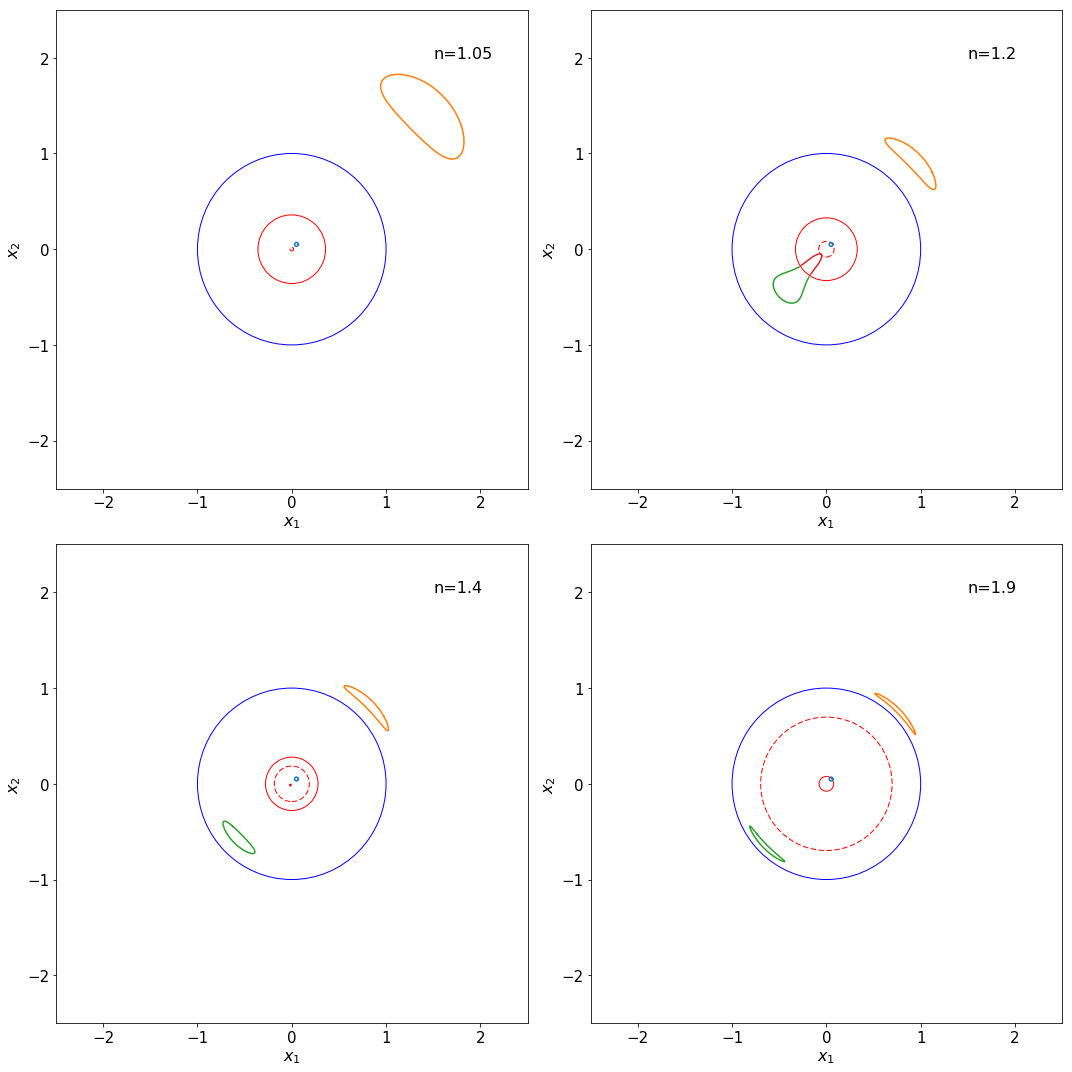

In [7]:
nl=[1.05,1.2,1.4,1.9]
px=[0,0,1,1]
py=[0,1,0,1]
yc1=0.03535
yc2=0.03535
rs=0.02
fig,ax=plt.subplots(2,2,figsize=(15,15))
for i in range(len(nl)):
    pl=pl_lens(co,n=nl[i])
    yc1=0.05
    yc2=0.05
    ys1,ys2,phi=pl.ext_source(yc1,yc2,rs)
    xi1,phi1,xi2,phi2,xi3,phi3=pl.ext_images(yc1,yc2,rs)

    er=plt.Circle((0,0),1.0,color='blue',fill=False)
    rad_cl=plt.Circle((0,0),pl.radcl(),color='red',fill=False)
    rad_cau=plt.Circle((0,0),pl.radcau(),ls='--',color='red',fill=False)
    ax[px[i],py[i]].add_artist(er)
    ax[px[i],py[i]].add_artist(rad_cl)
    ax[px[i],py[i]].add_artist(rad_cau)

    ax[px[i],py[i]].plot(ys1,ys2,'-')
    x1=np.array(xi1)*np.cos(phi1)
    x2=np.array(xi1)*np.sin(phi1)
    ax[px[i],py[i]].plot(x1,x2,'-')
    if (xi2.size>0):
        x1=np.array(xi2)*np.cos(phi2)
        x2=np.array(xi2)*np.sin(phi2)
        ax[px[i],py[i]].plot(x1,x2,'-')
    if (xi3.size>0):
        x1=np.array(xi3)*np.cos(phi3)
        x2=np.array(xi3)*np.sin(phi3)
        ax[px[i],py[i]].plot(x1,x2,'-')
    ax[px[i],py[i]].set_xlim([-2.5,2.5])
    ax[px[i],py[i]].set_ylim([-2.5,2.5])

    ax[px[i],py[i]].xaxis.set_tick_params(labelsize=15)
    ax[px[i],py[i]].yaxis.set_tick_params(labelsize=15)
    ax[px[i],py[i]].set_xlabel(r'$x_1$',fontsize=16)
    ax[px[i],py[i]].set_ylabel(r'$x_2$',fontsize=16)
    ax[px[i],py[i]].text(1.5,2,'n='+str(nl[i]),fontsize=16)
    
plt.tight_layout()

# Lenses with $n>2$

These lenses always produce multiple images because of the singuarity of their lensing potential.

The following are some examples of image diagrams for $n=2.0,2.1,3.0$.

/Users/massimo/anaconda/lib/python3.6/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/massimo/anaconda/lib/python3.6/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/Users/massimo/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/Users/massimo/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: divide by zero encountered in power
/Users/massimo/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in multiply
/Users/massimo/anaconda/lib/py

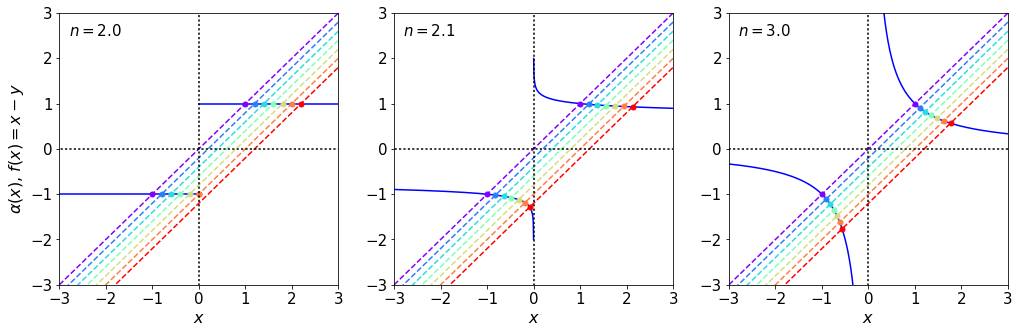

In [8]:
n=[2.0,2.1,3.0]

fig,ax=plt.subplots(1,3,figsize=(17,5))

x0=np.linspace(-3,-1.e-3,500)
x1=np.linspace(1.e-3,3,500)
    
ys=np.linspace(0,1.2,7)
    
for i in range(len(n)):
    pl=pl_lens(co,n=n[i])
    a0=pl.alpha(x0)
    a1=pl.alpha(x1)
    ax[i].plot(x0,a0,'-',color='blue')
    ax[i].plot(x1,a1,'-',color='blue')
    color=iter(cm.rainbow(np.linspace(0,1,len(ys))))
    for j in range(len(ys)):
        c=next(color)
        fu=f(x,ys[j])
        ax[i].plot(x,fu,'--',c=c)
        def func(xx):
            return f(xx,ys[j])-pl.alpha(xx)
        x0_ = fsolve(func,1.0)
        x1_ = fsolve(func,-1.0)
        x3_ = fsolve(func,0.0)
        if (np.abs(func(x0_))<1e-8):
            ax[i].plot(x0_,pl.alpha(x0_),'o',markersize=5,c=c)
        if (np.abs(func(x1_))<1e-8):
            ax[i].plot(x1_,pl.alpha(x1_),'o',markersize=5,c=c)
        if (np.abs(func(x3_))<1e-8 and j>0):
            ax[i].plot(x3_,pl.alpha(x3_),'o',markersize=5,c=c)
            
    ax[i].set_xlim([-3,3])
    ax[i].set_ylim([-3,3])
    ax[i].text(-2.8,2.5,'$n=$'+str(n[i]),fontsize=15)

    xa=[0.0,0.0]
    ya=[-10,10]
    ax[i].plot(xa,ya,':',color='black')
    
    xa=[-10.0,10.0]
    ya=[0,0]
    ax[i].plot(xa,ya,':',color='black')
    
    ax[0].set_ylabel(r'$\alpha(x)$, $f(x)=x-y$',fontsize=16)
    ax[0].legend()
    for i in range(3):
        ax[i].xaxis.set_tick_params(labelsize=15)
        ax[i].yaxis.set_tick_params(labelsize=15)
        ax[i].set_xlabel('$x$',fontsize=16)

Notice  that
* none of these lenses ever has a central image
* while for a lens with $n=2$ produces multiple images only for $|y|<y_{cut}=1$, all lenses with $n>2$ always have 2 images
* the $x_{-}$ image always moves towards the center of the lens as $y\rightarrow \infty$